### NA vs EU: The League of Legends debate


## Introduction: 
Our project involves comparing the competitive regions of North America and Western Europe
in the popular online competitive game League of Legends. Fans from both regions have commonly
bantered back and forth as to which region is the superior one, and thus, using the online
Kaggle League of Legends dataset (found at https://www.kaggle.com/chuckephron/leagueoflegends) this
project hopes to add fuel to the raging debate.

The Kaggle League of Legends dataset includes the data of every single competitive game of League of
Legends played from Summer 2014 to Summer 2017. While the dataset contains a vast amount of detailed
information about each game, the only data we will be concerning ourselves with is winrate. After all,
it doesn't matter how well your individual players perform in a game if the game is still lost. A team could
be massively ahead, then embarrassingly lose the overall match or series. Thus, the only valid metric for
comparison would be winrate.

Unfortunately, the dataset does not contain any information about things not directly related to the game.
Thus we cannot see team payrolls, staff size, or how long a team has been around. Those metrics would be
interesting to analyze, but we do not have the data to perform such analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.linear_model import LinearRegression

In [18]:
# import csv and peek it
df = pd.read_csv("LeagueofLegends.csv")

df.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


In [3]:
# look at the different types of tournaments
df.League.unique()

array(['NALCS', 'EULCS', 'LCK', 'LMS', 'CBLoL', 'TCL', 'OPL', 'CLS',
       'LLN', 'LJL', 'LCL', 'WC', 'MSI', 'IEM', 'RR'], dtype=object)

## Data Analysis

As we decided to focus on the EU and NA regions, the first thing that we decided to 
look at right away were winrates. No matter how well a team or an individual person
performs at an event, all that really matters is the end result. As a result, the main thing we
focused on were the winrates of each region at international events.

The first thing we did was actually distinguishing the columns of data that we need and
also getting information to actually figure out who won each of the games.

In [4]:
# we only want international tournaments, so 'WC', 'MSI', 'IEM', and 'RR'
international = ['WC', 'MSI', 'IEM', 'RR']
international_df = df[df['League'].isin(international)]

# we can also drop unnecessary columns to make data easier to view
international_df = international_df[['blueTeamTag', 'redTeamTag', 'bResult', 'Year', 'Season']]

international_df

,blueTeamTag,redTeamTag,bResult,Year,Season
6391,EDG,SSW,0,2014,Summer
6392,TSM,SK,1,2014,Summer
6393,DP,AHQ,0,2014,Summer
6394,TPA,SHR,0,2014,Summer
6395,SSW,AHQ,1,2014,Summer
...,...,...,...,...,...
7044,RPG,GAM,0,2017,Summer
7045,GAM,RPG,0,2017,Summer
7049,GAM,FW,0,2017,Spring
7055,SHR,OMG,1,2014,Summer


In [5]:
# need to identify NA and EU teams respectively
# we can do this by looking at the teams in NALCS and EULCS, because no teams have ever changed region
NA_df = df[df['League'] == 'NALCS']
EU_df = df[df['League'] == 'EULCS']

# find the unique team names in each region

# each team has played on blue side at least once
NA_teams = NA_df.blueTeamTag.unique()
EU_teams = EU_df.blueTeamTag.unique()

Next, we first figured out all the NA and EU teams that existed from 2014 through 2017.
Using our team lists, the results column and the League column (keeps track of the region that is playing)
we then calculated the winrates for the EU and NA regions at international events between 2014 and 2017.

In [6]:
# look at winrates of each region overall

NA_games_played = 0
NA_games_won = 0
EU_games_played = 0
EU_games_won = 0

for i, row in international_df.iterrows():
    if row['blueTeamTag'] in NA_teams:
        NA_games_played += 1
        if row['bResult'] == 1:
            NA_games_won += 1
    if row['redTeamTag'] in NA_teams:
        NA_games_played += 1
        if row['bResult'] == 0:
            NA_games_won += 1
    if row['blueTeamTag'] in EU_teams:
        EU_games_played += 1
        if row['bResult'] == 1:
            EU_games_won += 1
    if row['redTeamTag'] in EU_teams:
        EU_games_played += 1
        if row['bResult'] == 0:
            EU_games_won += 1

print('NA games played: ', NA_games_played, 'EU games played: ', EU_games_played)
print('NA winrate: ', NA_games_won/NA_games_played, 'EU winrate: ', EU_games_won/EU_games_played)

NA games played:  198 EU games played:  228
NA winrate:  0.47474747474747475 EU winrate:  0.42543859649122806


Looking at just this data we see that NA had a slightly higher winrate, by about fiver percent.
Unfortunately both regions do seem to be doing poorly as they both  are losing more than half
of their matches. However, this isnt enough, so next we decided to examine their perormances by 
season.

In [7]:
# analyze winrate over time
# first, need to figure out the appropriate time span
print(international_df.Season.unique())
print(international_df.Year.unique())

['Summer' 'Spring']
[2014 2015 2016 2017]


In [8]:
# next, calculate winrates for each region, over each time period
years = [2014, 2015, 2016, 2017]
seasons = ['Spring', 'Summer']
NA_winrates = []
EU_winrates = []

for year in years:
    for season in seasons:
        NA_games = 0
        NA_wins = 0
        EU_games = 0
        EU_wins = 0 
        
        for i, row in international_df.iterrows():
            if row['Season'] == season and row['Year'] == year:
                if row['blueTeamTag'] in NA_teams:
                    NA_games += 1
                    if row['bResult'] == 1:
                        NA_wins += 1
                if row['redTeamTag'] in NA_teams:
                    NA_games += 1
                    if row['bResult'] == 0:
                        NA_wins += 1
                if row['blueTeamTag'] in EU_teams:
                    EU_games += 1
                    if row['bResult'] == 1:
                        EU_wins += 1
                if row['redTeamTag'] in EU_teams:
                    EU_games += 1
                    if row['bResult'] == 0:
                        EU_wins += 1
        if(NA_games == 0):
            NA_winrates.append(-1)
        else:
            NA_winrates.append(NA_wins/NA_games)
        if(EU_games == 0):
            EU_winrates.append(-1)
        else:
            EU_winrates.append(EU_wins/EU_games)
print(NA_winrates)
print(EU_winrates)

[-1, 0.47619047619047616, 0.5333333333333333, 0.3888888888888889, 0.5172413793103449, 0.45, 0.36363636363636365, 0.5434782608695652]
[-1, 0.3333333333333333, 0.3333333333333333, 0.5365853658536586, 0.3333333333333333, 0.4857142857142857, 0.46511627906976744, 0.36363636363636365]


In [9]:
# there is no spring 2014 data, so we can drop that
del NA_winrates[0]
del EU_winrates[0]

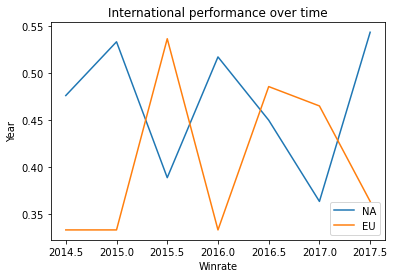

In [10]:
# we can now plot these winrates for easier visibility. .0 = spring, .5 = summer
x = [2014.5, 2015, 2015.5, 2016, 2016.5, 2017, 2017.5]
plt.plot(x, NA_winrates, label='NA')
plt.plot(x, EU_winrates, label ='EU')
plt.xlabel('Winrate')
plt.ylabel('Year')
plt.title('International performance over time')
plt.legend()
plt.show()

We gathered the winrates for each of the region for each season. The seasonal results seem to tell
us a completely different story. Both regions seem to have had ups and downs. There was any particular
time period where a region was dominating the international events. NA does seem to have a lost bit of
momentum as their last few seasons have been a bit patchy. Meanwhile, EU seemed to have had a rough start
in 2014 and 2015 but are doing a lot better as of the last few seasons.

With enough information about the regions, we decided to take a look at individual teams and how 
if there were any that standout. Among the NA and EU regions it does seem rightaway that not all
teams participated in all seasons at international events. 

IMPORTANT NOTE: 
Each region generally sends their top 1-3 teams to international events during each
season. As a result it does seem like we are missing data for a few teams when all that is really
going on is that they didn't qualify for the event.

In [11]:
# analyze the best team per region over time

# identifying the 'best team', aka the 3 teams with the most games played
winrate_dict_NA = {}
winrate_dict_EU = {}

for i, row in international_df.iterrows():
    if row['blueTeamTag'] in NA_teams:
        if row['blueTeamTag'] in winrate_dict_NA.keys():
            winrate_dict_NA[row['blueTeamTag']] += 1 
        else:
            winrate_dict_NA[row['blueTeamTag']] = 1

    if row['redTeamTag'] in NA_teams:
        if row['redTeamTag'] in winrate_dict_NA.keys():
            winrate_dict_NA[row['redTeamTag']] += 1 
        else:
            winrate_dict_NA[row['redTeamTag']] = 1
    if row['blueTeamTag'] in EU_teams:
        if row['blueTeamTag'] in winrate_dict_EU.keys():
            winrate_dict_EU[row['blueTeamTag']] += 1 
        else:
            winrate_dict_EU[row['blueTeamTag']] = 1

    if row['redTeamTag'] in EU_teams:
        if row['redTeamTag'] in winrate_dict_EU.keys():
            winrate_dict_EU[row['redTeamTag']] += 1 
        else:
            winrate_dict_EU[row['redTeamTag']] = 1
print(winrate_dict_NA)
print(winrate_dict_EU)

{'TSM': 77, 'C9': 49, 'CLG': 40, 'IMT': 16, 'DIG': 3, 'TL': 7, 'P1': 6}
{'SK': 9, 'FNC': 62, 'H2K': 28, 'OG': 22, 'G2': 57, 'SPY': 6, 'MSF': 12, 'GMB': 2, 'UOL': 26, 'ASC': 4}


In [12]:
# Pick the three teams with the highest games played,
# then plot their winrates over time

years = [2014, 2015, 2016, 2017]
seasons = ['Spring', 'Summer']
teams = ['TSM', 'C9', 'CLG', 'FNC', 'G2', 'H2K']
NA_TSM = []
NA_C9 = []
NA_CLG = []
EU_FNC = []
EU_G2 = []
EU_H2K = []

for year in years:
    for season in seasons:
        TSM = [0,0]
        C9 = [0,0]
        CLG = [0,0]
        FNC = [0,0]
        G2 = [0,0]
        H2K = [0,0]
        
        # spring 2014 doesn't exist
        if season == 'Spring' and year == 2014:
            continue
        
        for i, row in international_df.iterrows():
            if row['blueTeamTag'] in teams and row['Year'] == year and row['Season'] == season:
                if row['blueTeamTag'] == 'TSM':
                    TSM[1] += 1
                    if row['bResult'] == 1:
                        TSM[0] += 1
                if row['blueTeamTag'] == 'C9':
                    C9[1] += 1
                    if row['bResult'] == 1:
                        C9[0] += 1
                if row['blueTeamTag'] == 'CLG':
                    CLG[1] += 1
                    if row['bResult'] == 1:
                        CLG[0] += 1
                if row['blueTeamTag'] == 'FNC':
                    FNC[1] += 1
                    if row['bResult'] == 1:
                        FNC[0] += 1
                if row['blueTeamTag'] == 'G2':
                    G2[1] += 1
                    if row['bResult'] == 1:
                        G2[0] += 1
                if row['blueTeamTag'] == 'H2K':
                    H2K[1] += 1
                    if row['bResult'] == 1:
                        H2K[0] += 1         
            if row['redTeamTag'] in teams and row['Year'] == year and row['Season'] == season:
                if row['redTeamTag'] == 'TSM':
                    TSM[1] += 1
                    if row['bResult'] == 0:
                        TSM[0] += 1
                if row['redTeamTag'] == 'C9':
                    C9[1] += 1
                    if row['bResult'] == 0:
                        C9[0] += 1
                if row['redTeamTag'] == 'CLG':
                    CLG[1] += 1
                    if row['bResult'] == 0:
                        CLG[0] += 1
                if row['redTeamTag'] == 'FNC':
                    FNC[1] += 1
                    if row['bResult'] == 0:
                        FNC[0] += 1
                if row['redTeamTag'] == 'G2':
                    G2[1] += 1
                    if row['bResult'] == 0:
                        G2[0] += 1
                if row['redTeamTag'] == 'H2K':
                    H2K[1] += 1
                    if row['bResult'] == 0:
                        H2K[0] += 1      
        if TSM[1] == 0:
            NA_TSM.append(None)
        else:
            NA_TSM.append(TSM[0]/TSM[1])
        if C9[1] == 0:
            NA_C9.append(None)
        else:
            NA_C9.append(C9[0]/C9[1])
        if CLG[1] == 0:
            NA_CLG.append(None)
        else:
            NA_CLG.append(CLG[0]/CLG[1])
        if FNC[1] == 0:
            EU_FNC.append(None)
        else:
            EU_FNC.append(FNC[0]/FNC[1])
        if G2[1] == 0:
            EU_G2.append(None)
        else:
            EU_G2.append(G2[0]/G2[1])
        if H2K[1] == 0:
            EU_H2K.append(None)
        else:
            EU_H2K.append(H2K[0]/H2K[1])

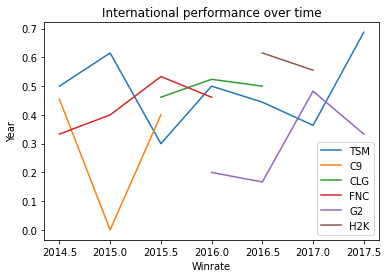

In [13]:
# we can now plot these winrates for easier visibility. .0 = spring, .5 = summer
x = [2014.5, 2015, 2015.5, 2016, 2016.5, 2017, 2017.5]
plt.plot(x, NA_TSM, label='TSM')
plt.plot(x, NA_C9, label='C9')
plt.plot(x, NA_CLG, label='CLG')
plt.plot(x, EU_FNC, label='FNC')
plt.plot(x, EU_G2, label='G2')
plt.plot(x, EU_H2K, label='H2K')
plt.xlabel('Winrate')
plt.ylabel('Year')
plt.title('International performance over time')
plt.legend()
plt.show()

In [14]:
# interestingly enough, TSM is the only team to compete in every single year
# there don't appear to be any outlier teams or whatnot, so there's not much to do

## Linear Regressions and Modelling
The analysis beforehand, while providing insight on the data, did not actually let us draw any conclusions.
As such, we will next perform linear regressions on the data in an attempt to predict future performance.
While there are some concerns that there is not enough data to create an accurate linear regression,
what we have should be barely sufficient to model the short term future.

-0.005458533874680649


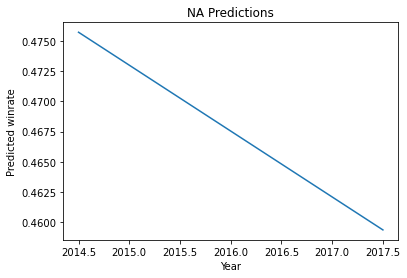

In [15]:
# initial hypothesis: neither region is particularly better, when looking at winrates that is.
m, b = np.polyfit(x, NA_winrates, 1)

NA_lin_winrates = []
for i in x:
    NA_lin_winrates.append(m*i + b)

print(m)
plt.title('NA Predictions')
plt.xlabel('Year')
plt.ylabel('Predicted winrate')
plt.plot(x, NA_lin_winrates)
plt.show()

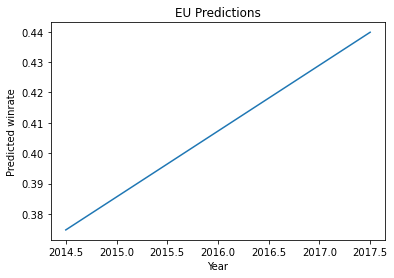

In [16]:
m, b = np.polyfit(x, EU_winrates, 1)

EU_lin_winrates = []
for i in x:
    EU_lin_winrates.append(m*i + b)

plt.title('EU Predictions')
plt.xlabel('Year')
plt.ylabel('Predicted winrate')
plt.plot(x, EU_lin_winrates)
plt.show()

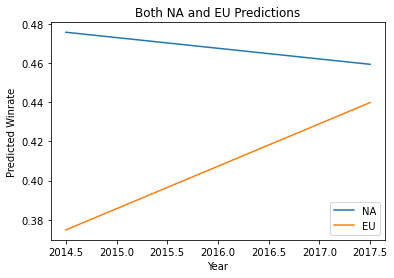

In [17]:
# plotting both lines on the same graph for visibility
plt.title("Both NA and EU Predictions")
plt.ylabel("Predicted Winrate")
plt.xlabel('Year')
plt.plot(x, NA_lin_winrates, label='NA')
plt.plot(x, EU_lin_winrates, label='EU')
plt.legend()
plt.show()

## Conclusion: 

In conclusion, the performance of North America and Europe is mostly disappointing, with both regions
failing to surpass or equal 50% winrates overall. While this is generally unsurprising given the dominance
of Korean teams in League of Legends tournaments, it is still quite sad to look at.

However, when comparing North America and Europe directly with each other, North America has the clear
advantage, with consistently higher winrates across the board. Looking at our latest linear regression,
Europe is closing the game at a slow but steady pace, mirroring North America's even slower decline.
Thus while North America wins the debate in the short term, in the future few years we can definitely 
expect to see Europe as the winner of this debate.

Comparing prominent teams from each region has different results, with no particular outlier teams
standing out. This is unsurprising from an anecdotal perspective - in this time period there we no 
remarkable teams which stood out internationally. Every single North American and European dream team
was thoroughly crushed on the international stage.

From our perspective in the future, we can see that this trend has continued. Though I do not have the
datasets to support it, from what League of Legends international competitions have looked like in the recent
years after those which the Kaggle dataset has recorded, Europe has emerged as a dominant force, while North
America remains the trash can of the major regions. European teams have consistently performed well in the 
World Championships (WC) and Mid Season Invitational (MSI) while North America fails to leave each of the
first few stages. Whether or not this trend continues in the data we cannot tell, but anecdotally it seems
good enough.

Future studies with more current data could be an interesting continuation of this study. While things have
probably remained constant, it would be interesting to see whether Europe's rise has continued statistically,
and if it continues to grow at that solid rate even today. Other interesting studies could include team
spending efficiency, because North America is currently a region known for its lucrative player contracts,
to the point where it is becoming a 'retirement home' for formerly skilled players. Its performance in
international competitions, however, fails to grow, regardless of how much money is poured in.

As a North American fan, the results of this study were pretty disappointing. I was hoping for a decisive
moment of truth where the statistics could show a triumphant NA and a defeated EU. Instead, we see the somewhat
dreary results, and I'm left cheering for teams that I know will lose on the international stage.